#### 如果有Iprogress not found的錯誤,更新ipywidgets

`conda install -c conda-forge ipywidgets`

#### 查看pipeline支援的任務類型

In [10]:
from transformers.pipelines import SUPPORTED_TASKS

for k, v in SUPPORTED_TASKS.items():
    print(k,' -> ' ,v['type'])

audio-classification  ->  audio
automatic-speech-recognition  ->  multimodal
text-to-audio  ->  text
feature-extraction  ->  multimodal
text-classification  ->  text
token-classification  ->  text
question-answering  ->  text
table-question-answering  ->  text
visual-question-answering  ->  multimodal
document-question-answering  ->  multimodal
fill-mask  ->  text
summarization  ->  text
translation  ->  text
text2text-generation  ->  text
text-generation  ->  text
zero-shot-classification  ->  text
zero-shot-image-classification  ->  multimodal
zero-shot-audio-classification  ->  multimodal
image-classification  ->  image
image-feature-extraction  ->  image
image-segmentation  ->  multimodal
image-to-text  ->  multimodal
object-detection  ->  multimodal
zero-shot-object-detection  ->  multimodal
depth-estimation  ->  image
video-classification  ->  video
mask-generation  ->  multimodal
image-to-image  ->  image


#### 如何查看支援類型的細節說明

In [11]:
from pprint import pprint
for k, value in SUPPORTED_TASKS.items():
    print(f'支援任務:{k}')
    pprint(value)
    break

#default->是使用的預設模型
#impl->對應的class
#pt->支援pytorch模型
#tf->支援TensorFlow模型

支援任務:audio-classification
{'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}},
 'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>,
 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,),
 'tf': (),
 'type': 'audio'}


#### 依據任務類型直接建立Pipeline,預設都是英文模型

In [12]:
from transformers import pipeline
#沒有指定模型會有警告,並且告知預設的模型->
pipe = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
pipe("very good!")

[{'label': 'POSITIVE', 'score': 0.9998525381088257}]

#### 指定任務類型, 再指定模型, 建立基於指定模型的pipeline


In [14]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese",)
pipe("我覺得有待改進")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9404445886611938}]

#### 預先下載模型,再建立pipeline
- 這種方式必需同時指定model和tokenizer

In [15]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')
tokenizer = AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')
pipe = pipeline('text-classification', model=model, tokenizer = tokenizer)
pipe("我覺得很好吃")

[{'label': 'positive (stars 4 and 5)', 'score': 0.9163680076599121}]

#### 檢查pipeline是在什麼樣的CPU上面執行

In [16]:
pipe.model.device

device(type='cpu')

In [17]:
#計算在cpu上跑的時間
import torch
import time
times = []
for i in range(100):
    #torch.cuda.synchronize()
    start = time.time()
    pipe("我覺得還不錯")
    #torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)

print(sum(times)/ 100)

0.3171469950675964


##### 使用GPU處理


In [18]:
#有GPU的處理方式
#pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese",device="0")
#pipe("我覺得有待改進")

#### pipeline實體參數的查詢

In [19]:
qa_pipe = pipeline("question-answering", model='uer/roberta-base-chinese-extractive-qa')

In [20]:
qa_pipe

In [21]:
from transformers import QuestionAnsweringPipeline
#按右鍵移至類型定義
#找尋def __call__()
QuestionAnsweringPipeline

transformers.pipelines.question_answering.QuestionAnsweringPipeline

In [22]:
qa_pipe(question='台灣的首都是哪裏?',context='台灣的首都是台北')

{'score': 0.2752968966960907, 'start': 6, 'end': 8, 'answer': '台北'}

In [23]:
#限定回答長度:1
qa_pipe(question='台灣的首都是哪裏?',context='台灣的首都是台北',max_answer_len=1)


{'score': 0.0016681747511029243, 'start': 7, 'end': 8, 'answer': '北'}

#### 其他pipline範例
- 零樣本的測試

In [34]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

In [27]:
detector

In [ ]:
from transformers import ZeroShotObjectDetectionPipeline

In [41]:
import requests
from PIL import Image

#images資料夾內有此照片
url = 'https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640'
im = Image.open(requests.get(url,stream=True).raw)


In [42]:
predictions = detector(im,
         candidate_labels=["hat",'sunglasses','book'])
predictions

[{'score': 0.2589316666126251,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 430, 'ymax': 265}},
 {'score': 0.1850164830684662,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 502, 'ymax': 427}},
 {'score': 0.11234676837921143,
  'label': 'hat',
  'box': {'xmin': 39, 'ymin': 173, 'xmax': 260, 'ymax': 363}}]

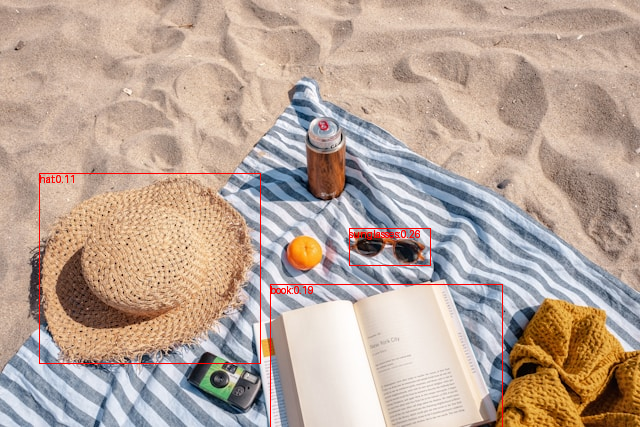

In [44]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction['box']
    label = prediction["label"]
    score = prediction['score']
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin,ymin),f"{label}:{round(score,2)}",fill="red")
im

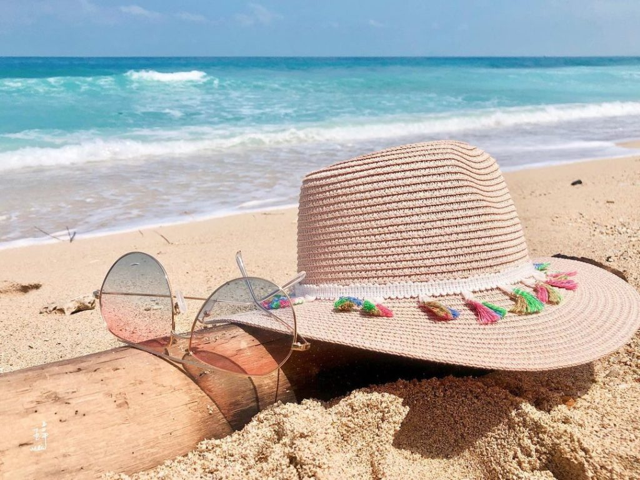

In [51]:
url = 'https://funintw.com/wp-content/uploads/2021/10/twei.cc_117921325_308738223735883_2305238526604465371_n-1024x769.jpg'
im = Image.open(requests.get(url,stream=True).raw)
res_image = im.resize((640,480))
res_image

In [53]:
#無法猜到
predictions = detector(im,
         candidate_labels=["hat",'glasses'])
predictions

[]